# Emotion Classifier using Streamlit

Youtube: [link](https://www.youtube.com/watch?v=tLsg01D6k6g&t=793s)

Original Dataset: [link](https://raw.githubusercontent.com/Jcharis/end2end-nlp-project/main/notebooks/data/emotion_dataset_2.csv)

Cleaned Dataset: [link](https://raw.githubusercontent.com/Jcharis/end2end-nlp-project/main/notebooks/data/emotion_dataset_raw.csv)

## Necessary Packages 
pip install scikit-learn eli5 lime neattext pandas spacy numpy seaborn altair streamlit

In [1]:
# Packages for EDA
import pandas as pd
import numpy as np

# Packages for visualization
import seaborn as sns

# Packages for text cleaning
import neattext.functions as nfx

#  Packages for ML #
## Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Collection

In [2]:
# Load the dataset

url = "https://raw.githubusercontent.com/Jcharis/end2end-nlp-project/main/notebooks/data/emotion_dataset_raw.csv"

df = pd.read_csv(url)

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
# Counting Values

df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

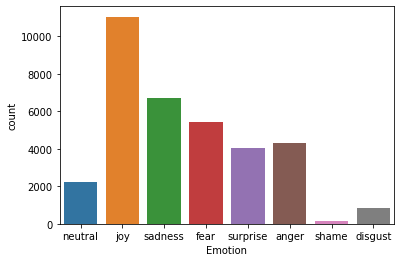

In [5]:
# Plot
sns.countplot(x='Emotion', data=df)

## Data Preparations

~ Check what inside nfx ~

dir(nfx)

In [6]:
# User handles

df['Cleaned_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [7]:
# Stopwords

df['Cleaned_Text'] = df['Cleaned_Text'].apply(nfx.remove_stopwords)

In [8]:
df.head()

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...


In [9]:
# Removing Special Character
df['Cleaned_Text'] = df['Cleaned_Text'].apply(nfx.remove_special_characters)

In [10]:
df.head()

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...


## Feature Engineering

In [11]:
# Features & Labels

X_features = df['Cleaned_Text']
y_labels = df['Emotion']

In [12]:
# Splir Data

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.3, random_state=42)

In [13]:
# Build Pipeline

from sklearn.pipeline import Pipeline

In [14]:
# Logistic Regression Pipeline

logreg_pipe = Pipeline(steps=[('cv', CountVectorizer()),('logreg', LogisticRegression())])

In [15]:
# Train and Fit Data

logreg_pipe.fit(X_train, y_train)

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('logreg', LogisticRegression())])

The output above is not an error -- Just warnings

In [16]:
logreg_pipe

Pipeline(steps=[('cv', CountVectorizer()), ('logreg', LogisticRegression())])

In [17]:
# Check Accuracy
logreg_pipe.score(X_test, y_test)

0.6215750143705691

In [18]:
# Make A predictions
text1 = 'This movie is well played by the actor, It was so happy'

In [19]:
logreg_pipe.predict([text1])

array(['joy'], dtype=object)

In [20]:
# Prediction Probabilty
logreg_pipe.predict_proba([text1])

array([[9.42978949e-03, 4.10799243e-03, 5.98794092e-02, 5.65777132e-01,
        5.13260035e-05, 3.43053940e-01, 1.84119154e-04, 1.75162923e-02]])

In [21]:
# To know the class
logreg_pipe.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

## Saving the Model & Pipeline

In [23]:
import joblib

pipeline_file = open("emotion_classifier_logreg.pkl", 'wb')
joblib.dump(logreg_pipe, pipeline_file)
pipeline_file.close()

Don't forget to move or copy the pkl model into the Deployment, inside models directory to be deployed